# Laboratorio 08: Implementación de Redes Neuronales con Keras

## Dayana Andrea Henao Arbeláez 

In [121]:
import numpy as np
import tensorflow as tf
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

1. Para el dataset make a moon de sklearn, construir un modelo de una red neuronal con keras para clasificar los datos.



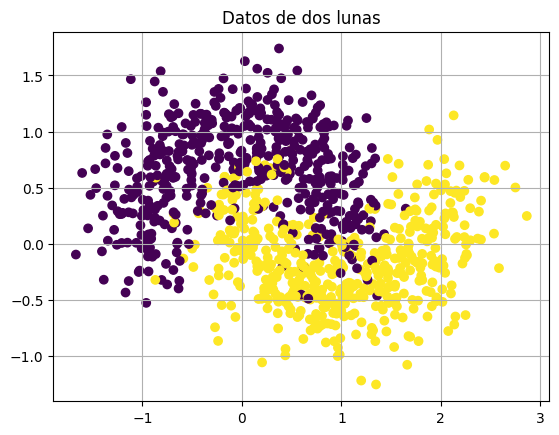

In [108]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.3, random_state=42)

plt.scatter(X[:,0], X[:,1], c=y, cmap="viridis")
plt.title("Datos de dos lunas")
plt.grid()
plt.show()


In [115]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [116]:
modelo = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

In [117]:
modelo.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

Epoch 1/300
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4787 - loss: 0.7098 - val_accuracy: 0.5000 - val_loss: 0.6981
Epoch 2/300
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5000 - loss: 0.6880 - val_accuracy: 0.5000 - val_loss: 0.6803
Epoch 3/300
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5075 - loss: 0.6697 - val_accuracy: 0.6000 - val_loss: 0.6610
Epoch 4/300
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6263 - loss: 0.6492 - val_accuracy: 0.7300 - val_loss: 0.6394
Epoch 5/300
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7425 - loss: 0.6261 - val_accuracy: 0.7950 - val_loss: 0.6157
Epoch 6/300
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8087 - loss: 0.5992 - val_accuracy: 0.8200 - val_loss: 0.5906
Epoch 7/300
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8325 - loss: 0.5710 - val_accuracy: 0.8200 - val_loss: 0.5642
Epoch 8/300
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8425 - loss: 0.5427 - val_accuracy: 0.8100 - v

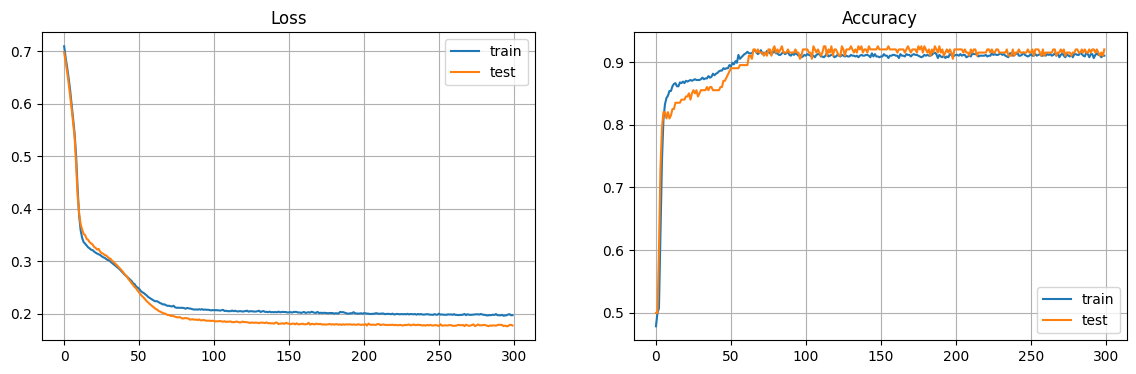

In [118]:
history = modelo.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=300, verbose=1)
# Evaluación del modelo
_, train_acc = modelo.evaluate(X_train, y_train, verbose=0)
_, test_acc = modelo.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# Gráficas:
plt.figure(figsize=(14,4))
# Gráfica de pérdidas durante el entrenamiento
plt.subplot(121)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.grid()
plt.legend()
# Gráfica de las precisión durante el entrenamiento
plt.subplot(122)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.grid()
plt.show()

In [119]:
loss, acc = modelo.evaluate(X_test, y_test)
print("Accuracy del modelo en test:", acc)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9200 - loss: 0.1777 
Accuracy del modelo en test: 0.9200000166893005


2. Para el dataset load digits, construir un modelo de red neuronal empleando keras para realizar la clasificación.

In [83]:
digits = load_digits(n_class=6)
X, y = digits.data, digits.target
n_samples, n_features = X.shape

In [84]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  9.,  0.,  0.],
       [ 0.,  0.,  0., ...,  4.,  0.,  0.],
       [ 0.,  0.,  6., ...,  6.,  0.,  0.]])

In [85]:
digits.data.shape

(1083, 64)

In [86]:
digits.target

array([0, 1, 2, ..., 4, 4, 0])

In [87]:
digits.target.shape

(1083,)

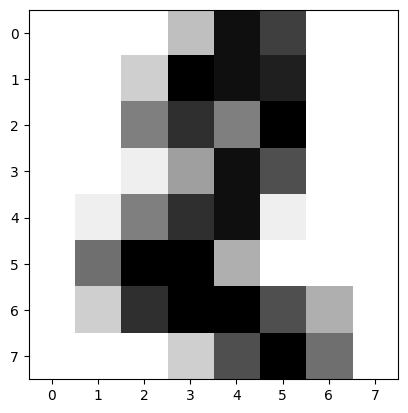

In [88]:
plt.imshow(X[2].reshape(8, 8), cmap='binary')

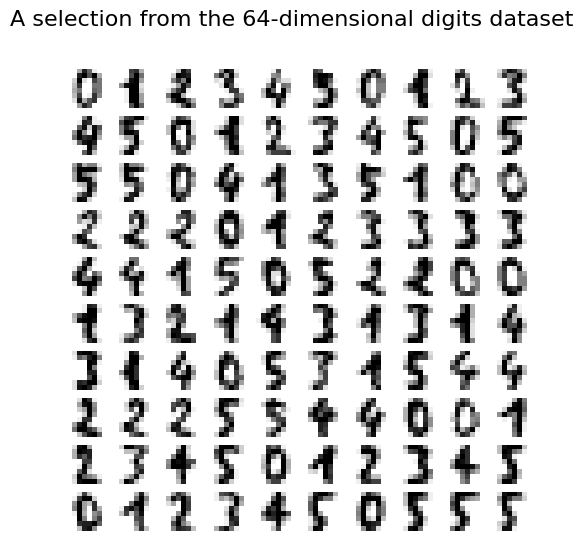

In [89]:
fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(6, 6))
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(X[idx].reshape((8, 8)), cmap=plt.cm.binary)
    ax.axis("off")
_ = fig.suptitle("A selection from the 64-dimensional digits dataset", fontsize=16)

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [91]:
y_test

array([1, 3, 2, 1, 3, 4, 3, 2, 2, 0, 3, 1, 4, 2, 5, 3, 5, 1, 1, 4, 0, 4,
       5, 4, 0, 2, 3, 5, 5, 2, 5, 1, 5, 1, 0, 1, 1, 2, 2, 2, 5, 2, 4, 3,
       3, 1, 0, 5, 2, 3, 3, 3, 1, 4, 1, 0, 2, 3, 3, 3, 1, 1, 5, 0, 1, 3,
       0, 3, 0, 5, 2, 2, 5, 5, 4, 5, 4, 4, 3, 4, 4, 2, 3, 1, 4, 2, 1, 3,
       3, 5, 4, 0, 0, 0, 1, 4, 3, 0, 0, 4, 4, 2, 0, 5, 0, 3, 5, 5, 0, 0,
       1, 4, 2, 4, 1, 4, 4, 1, 1, 4, 0, 2, 2, 3, 0, 1, 0, 5, 2, 3, 4, 2,
       2, 1, 0, 5, 0, 3, 5, 0, 2, 0, 3, 4, 4, 0, 0, 3, 2, 3, 4, 4, 3, 4,
       5, 4, 0, 3, 3, 2, 4, 2, 0, 0, 3, 3, 1, 0, 4, 4, 0, 1, 1, 2, 2, 1,
       2, 4, 3, 0, 2, 4, 5, 1, 4, 5, 1, 0, 0, 3, 2, 5, 2, 1, 0, 5, 0, 1,
       5, 3, 1, 2, 4, 2, 3, 4, 2, 3, 4, 0, 2, 4, 3, 3, 2, 0, 2])

In [92]:
modelo = tf.keras.models.Sequential()
modelo.add(tf.keras.layers.Dense(64, activation='relu', input_shape=(64,)))
modelo.add(tf.keras.layers.Dense(32, activation='relu'))
modelo.add(tf.keras.layers.Dense(16, activation='relu'))
modelo.add(tf.keras.layers.Dense(6, activation='softmax'))

modelo.summary()

/home/dayana-henao/Escritorio/Aprendizaje_Estadistico/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_30 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 6)              │           102 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,870 (26.84 KB)

 Trainable params: 6,870 (26.84 KB)

 Non-trainable params: 0 (0.00 B)

In [93]:
modelo.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)


Epoch 1/40
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3441 - loss: 2.1562 - val_accuracy: 0.5991 - val_loss: 1.2308
Epoch 2/40
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7448 - loss: 0.7953 - val_accuracy: 0.8249 - val_loss: 0.6849
Epoch 3/40
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8961 - loss: 0.4361 - val_accuracy: 0.9171 - val_loss: 0.4108
Epoch 4/40
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9527 - loss: 0.2517 - val_accuracy: 0.9539 - val_loss: 0.2395
Epoch 5/40
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9654 - loss: 0.1532 - val_accuracy: 0.9493 - val_loss: 0.1780
Epoch 6/40
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9792 - loss: 0.1048 - val_accuracy: 0.9631 - val_loss: 0.1328
Epoch 7/40
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9896 - loss: 0.0701 - val_accuracy: 0.9770 - val_loss: 0.1032
Epoch 8/40
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9942 - loss: 0.0533 - val_accuracy: 0.9631 - val_loss:

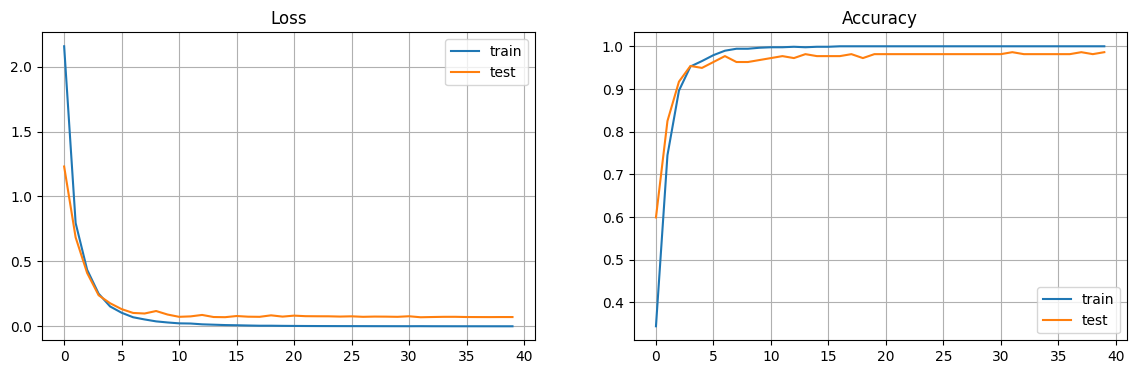

In [94]:
history = modelo.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=40, verbose=1)
# Evaluación del modelo
_, train_acc = modelo.evaluate(X_train, y_train, verbose=0)
_, test_acc = modelo.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# Gráficas:
plt.figure(figsize=(14,4))
# Gráfica de pérdidas durante el entrenamiento
plt.subplot(121)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.grid()
plt.legend()
# Gráfica de las precisión durante el entrenamiento
plt.subplot(122)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.grid()
plt.show()


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


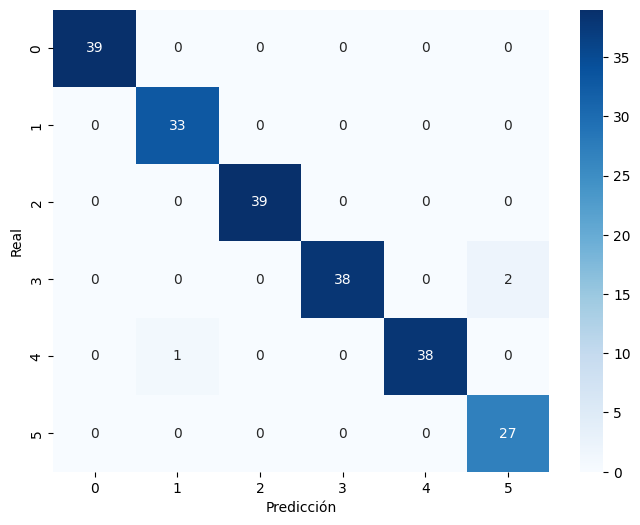

In [95]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = modelo.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)

cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()


In [96]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_classes))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       0.97      1.00      0.99        33
           2       1.00      1.00      1.00        39
           3       1.00      0.95      0.97        40
           4       1.00      0.97      0.99        39
           5       0.93      1.00      0.96        27

    accuracy                           0.99       217
   macro avg       0.98      0.99      0.99       217
weighted avg       0.99      0.99      0.99       217

